In [88]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [89]:
# trip.csv 불러오기
data = pd.read_csv('trip.csv')

In [90]:
# trip.csv 표 츌력
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [91]:
# name 삭제
data.drop('passenger_name',axis = 1,inplace = True)

In [92]:
# data 타입 보는 명령어
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22701 non-null  object 
 1   tpep_dropoff_datetime  22701 non-null  object 
 2   payment_method         22701 non-null  object 
 3   passenger_count        22701 non-null  int64  
 4   trip_distance          22701 non-null  float64
 5   fare_amount            22698 non-null  float64
 6   tip_amount             22701 non-null  float64
 7   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


In [93]:
# fare_amount 칼럼 타입 보기
str(data['fare_amount'].dtype)

'float64'

In [94]:
# fare_amount 데이터의 통계적 정보 확인
data['fare_amount'].describe()

count    22698.000000
mean        13.024009
std         13.240074
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [95]:
# fare_amount 표준편차 확
round(data['fare_amount'].std(),6)

np.float64(13.240074)

In [96]:
# 결측치 비율 확인
data.isna().mean()

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [97]:
# fare_amount 칼럼 결측치 비율 확인
round(data['fare_amount'].isna().mean(),5)

np.float64(0.00013)

In [98]:
# fare_amount 칼럼 결측치 평균으로 채우기
data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].mean())

In [99]:
data['fare_amount']

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22701, dtype: float64

<Axes: ylabel='fare_amount'>

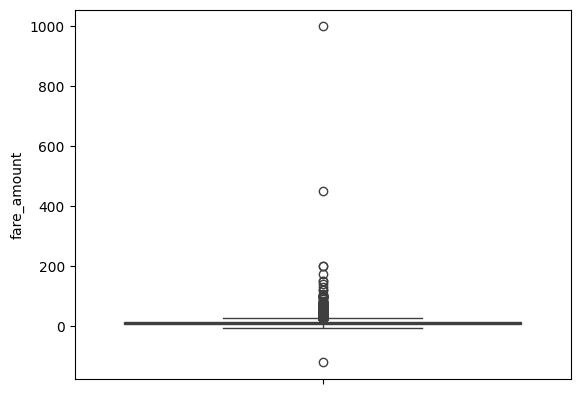

In [100]:
# boxplot으로 아웃라이어 확인 
sns.boxplot(data['fare_amount'])

<Axes: xlabel='None', ylabel='fare_amount'>

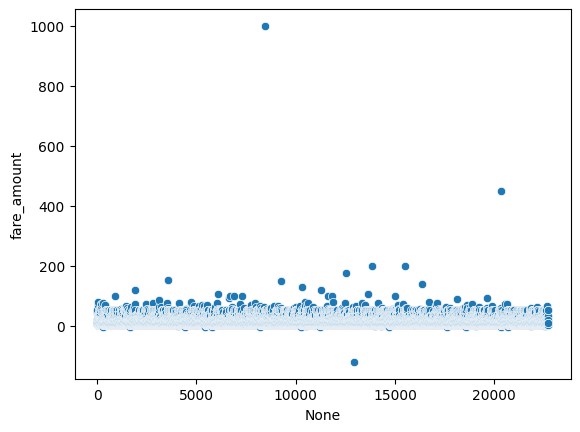

In [101]:
# scatterplot으로 아웃라이너 확인
sns.scatterplot(x=data.index,y=data['fare_amount'])

In [102]:
# 아웃라이너 삭제
data= data[data['fare_amount'] <= 400]

<Axes: xlabel='None', ylabel='fare_amount'>

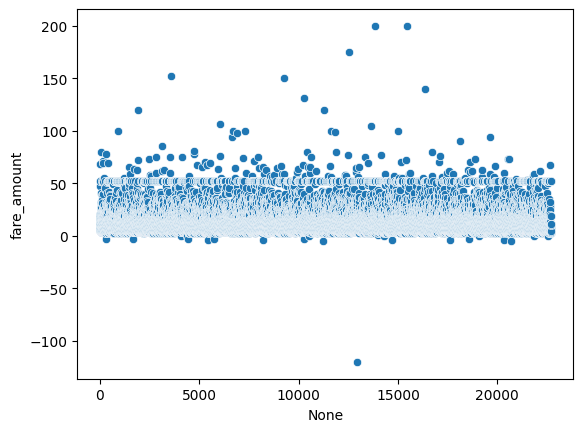

In [103]:
sns.scatterplot(x=data.index,y=data['fare_amount'])

In [104]:
# 택시 칼럼 변경
data= data.rename({'tpep_pickup_datetime' : 'taxi_pickup_datetime', 'tpep_dropoff_datetime': 'taxi_dropoff_datetime'},axis = 1)

In [105]:
data

,taxi_pickup_datetime,taxi_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [106]:
# 택시 payment_method 칼럼 변수 변경 
data['payment_method'] = data['payment_method'].replace({'D' : 'Debit Card', 'C' : 'Cash'})

In [107]:
data['payment_method'] = data['payment_method'].apply(lambda x: 'Card' if 'Card' in x else x)

In [108]:
data

,taxi_pickup_datetime,taxi_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


In [109]:
# 택시 주행시간 계산

# 택시 픽업시간 입력
data['taxi_pickup_datetime'] = pd.to_datetime(data['taxi_pickup_datetime'])

In [110]:
# 택시 하차시간 변경
data['taxi_dropoff_datetime'] = pd.to_datetime(data['taxi_dropoff_datetime'])

In [111]:
# 주행시간 계
data['trip_duration'] = (data['taxi_dropoff_datetime'] - data['taxi_pickup_datetime']).dt.total_seconds()

In [112]:
data

,taxi_pickup_datetime,taxi_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,844.0
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,1590.0
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,432.0
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,1815.0
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,1003.0
...,...,...,...,...,...,...,...,...,...
22696,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,196.0
22697,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,2448.0
22698,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,248.0
22699,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,716.0


Text(0.5, 1.0, 'Fare vs. Trip Duration')

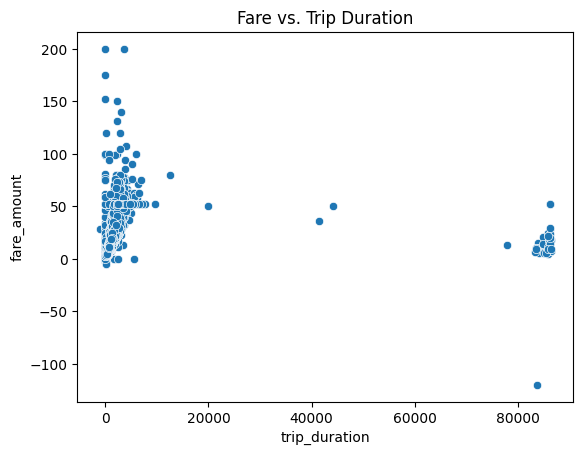

In [113]:
# 요금과 주행 시간의 관계 분석
sns.scatterplot(x='trip_duration', y='fare_amount', data=data)
plt.title('Fare vs. Trip Duration')

In [116]:
# 시간당 요금 비교
data['fare_per_min'] = data['fare_amount'] / data['trip_duration']

In [117]:
# 거리당 요금 비교
data['fare_per_km'] = data['fare_amount'] / data['trip_distance']

In [118]:
data

,taxi_pickup_datetime,taxi_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration,fare_per_min,fare_per_km,pickup_hour
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,844.0,0.015403,3.892216,8
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,1590.0,0.010063,8.888889,14
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,432.0,0.015046,6.500000,7
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,1815.0,0.011295,5.540541,13
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,1003.0,0.016451,3.775744,23
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,196.0,0.020408,6.557377,17
22697,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,2448.0,0.021242,3.111909,16
22698,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,248.0,0.018145,10.714286,14
22699,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,716.0,0.014665,4.449153,12


Text(0.5, 1.0, 'Distribution of Pickup Times by Hour')

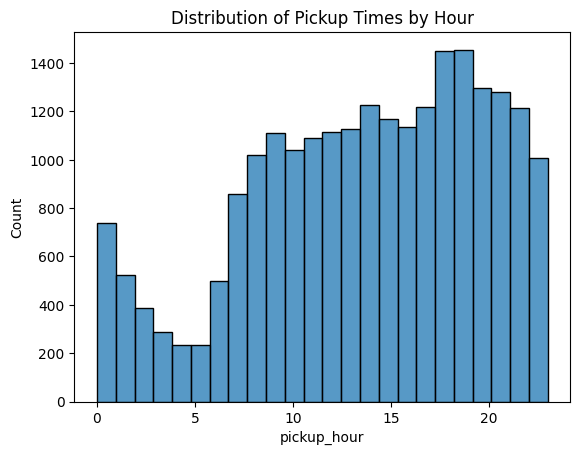

In [115]:
# 시간대별 승차 분석
data['pickup_hour'] = data['taxi_pickup_datetime'].dt.hour

sns.histplot(data['pickup_hour'], bins=24)
plt.title("Distribution of Pickup Times by Hour")